In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img = cv2.imread('handwriting.jpg', 0)
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, 3, 2)
cnt = contours[0]

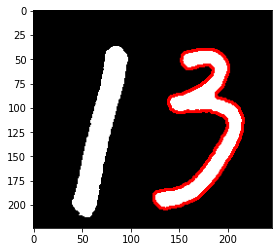

In [6]:
img_color1 = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
img_color2 = np.copy(img_color1)
cv2.drawContours(img_color1, [cnt], 0, (0, 0, 255), 2)
plt.imshow(img_color1[:,:,::-1])
plt.show()

In [7]:
# 轮廓面积
area = cv2.contourArea(cnt)
print(area)

4807.0


In [9]:
# 像素点个数
print(cv2.countNonZero(img))

55104


In [10]:
# 轮廓周长
# 参数2表示轮廓是否封闭
perimeter = cv2.arcLength(cnt, True)
print(perimeter)

612.7838320732117


In [11]:
# 图像矩
# 矩可以理解为图像的各类几何特征
M = cv2.moments(cnt)
# 质心计算
cx, cy = M['m10'] / M['m00'], M['m01'] / M['m00']
print((cx, cy))

(176.70723250814783, 117.96879550655294)


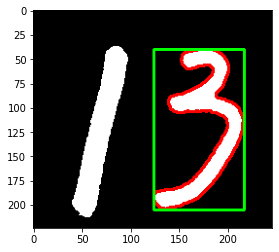

In [12]:
# 外接矩形
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img_color1, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(img_color1[:,:,::-1])
plt.show()

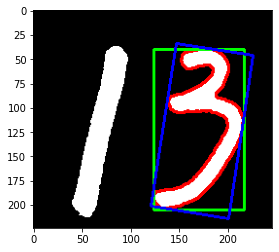

In [14]:
# 最小外接矩形
rect = cv2.minAreaRect(cnt)
# 矩形的四个角点取整
# np.int0(x)是把x取整的操作，比如377.93就会变成377，也可以用x.astype(np.int)
box = np.int0(cv2.boxPoints(rect))
cv2.drawContours(img_color1, [box], 0, (255, 0, 0), 2)
plt.imshow(img_color1[:,:,::-1])
plt.show()

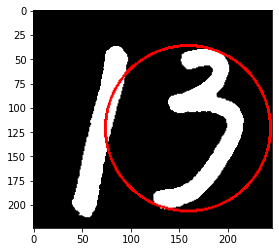

In [15]:
# 最小外接圆
(x, y), radius = cv2.minEnclosingCircle(cnt)
(x, y, radius) = np.int0((x, y, radius))
cv2.circle(img_color2, (x, y), radius, (0, 0, 255), 2)
plt.imshow(img_color2[:,:,::-1])
plt.show()

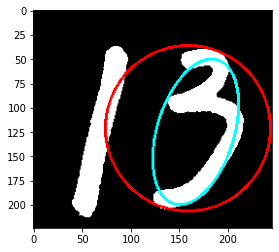

In [16]:
# 拟合椭圆
ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(img_color2, ellipse, (255, 255, 0), 2)
plt.imshow(img_color2[:,:,::-1])
plt.show()

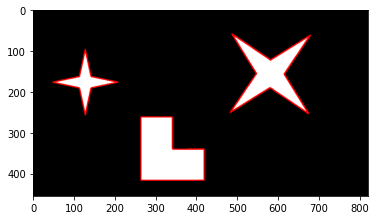

In [22]:
# 形状匹配
# 检测两个形状之间的相似度，返回值越小，越相似
img = cv2.imread('shapes.jpg', 0)
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, hierarchy = cv2.findContours(thresh, 3, 2)
# 用于绘制的彩色图
img_color = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_color, contours, -1, (0, 0, 255), 2)
plt.imshow(img_color[:,:,::-1])
plt.show()

In [23]:
print(len(contours))

3


In [25]:
# 参数3是匹配方法
# 参数4是OpenCV的预留参数
cnt_a, cnt_b, cnt_c = contours[0], contours[1], contours[2]
print(cv2.matchShapes(cnt_b, cnt_b, 1, 0.0))
print(cv2.matchShapes(cnt_b, cnt_c, 1, 0.0))
print(cv2.matchShapes(cnt_b, cnt_a, 1, 0.0))

0.0
2.176955476018705e-05
0.4181711500194456
